In [38]:
import os
import glob
import pandas as pd
import numpy as np
from typing import List
import plotly.graph_objects as go
import plotly.express as px
# from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns

In [27]:
data_root = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + 'data')
df = pd.read_csv(f'{data_root}/processed/denmark_market_data.csv')
df = df.dropna()

In [28]:
df["utc_timestamp"] = pd.to_datetime(df["utc_timestamp"])
df["utc_timestamp"] = df["utc_timestamp"].dt.tz_convert(None)
df = df.set_index('utc_timestamp', drop = True)

In [29]:
df.head()

,DK_load_actual_entsoe_transparency,DK_solar_generation_actual,DK_wind_onshore_generation_actual,DK_price_day_ahead,DK_temperature,DK_radiation_direct_horizontal,DK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,
2015-01-01 04:00:00,1751.47,0.01,1781.53,14.50,4.635,0.0000,0.0000
2015-01-01 05:00:00,1767.16,0.01,1907.46,10.76,4.724,0.0000,0.0000
2015-01-01 06:00:00,1903.30,0.01,2073.49,12.01,4.918,0.0000,0.0000
2015-01-01 07:00:00,1985.32,0.01,2232.27,12.39,5.125,0.0017,0.1686
2015-01-01 08:00:00,2015.15,0.83,2323.74,14.04,5.232,0.1794,11.4613


In [30]:
df.tail()

,DK_load_actual_entsoe_transparency,DK_solar_generation_actual,DK_wind_onshore_generation_actual,DK_price_day_ahead,DK_temperature,DK_radiation_direct_horizontal,DK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,
2019-12-31 19:00:00,2184.75,0.0,774.85,33.54,1.961,0.0,0.0
2019-12-31 20:00:00,2054.01,0.0,588.24,33.17,1.874,0.0,0.0
2019-12-31 21:00:00,1970.77,0.0,625.38,33.04,1.957,0.0,0.0
2019-12-31 22:00:00,1909.93,0.0,711.98,32.28,2.213,0.0,0.0
2019-12-31 23:00:00,1944.39,0.0,893.56,33.42,2.469,0.0,0.0


In [34]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [35]:
df.columns

Index(['DK_load_actual_entsoe_transparency', 'DK_solar_generation_actual',
       'DK_wind_onshore_generation_actual', 'DK_price_day_ahead',
       'DK_temperature', 'DK_radiation_direct_horizontal',
       'DK_radiation_diffuse_horizontal'],
      dtype='object')

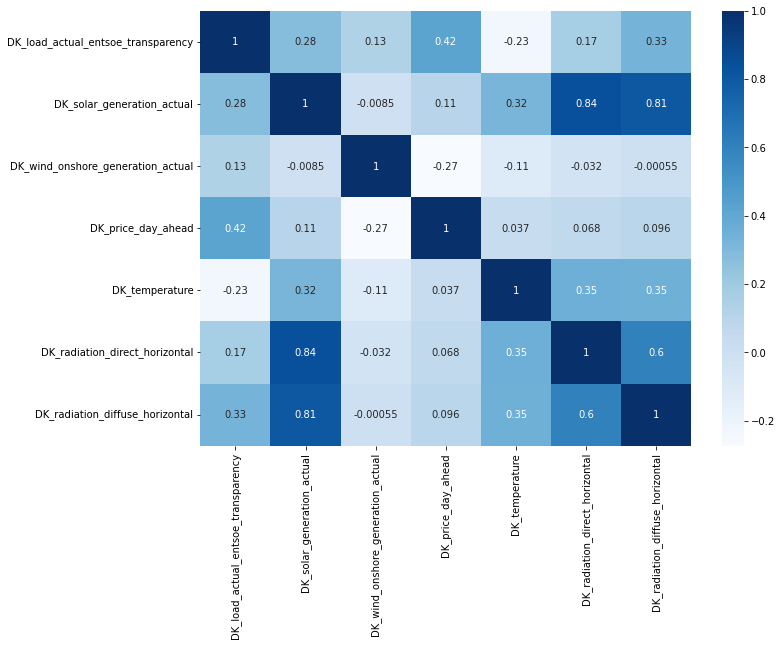

In [42]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap = "Blues",annot=True)
plt.show()

## App parameters

In [12]:
start_time = max(min(df.index), dt.fromisoformat("2017-01-01"))
end_time = min(max(df.index), dt.fromisoformat("2019-12-31 23:00:00"))
num_days_for_test = 30

In [13]:
df_app = df.loc[start_time:end_time]
df_app["ds"] = df_app.index
df_app.rename({"DK_price_day_ahead": "y"}, axis = 1, inplace = True)

/var/folders/w1/lt2cgmv5371ct8yj1yg4xwq80000gn/T/ipykernel_31581/2715537043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app["ds"] = df_app.index
/var/folders/w1/lt2cgmv5371ct8yj1yg4xwq80000gn/T/ipykernel_31581/2715537043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app.rename({"DK_price_day_ahead": "y"}, axis = 1, inplace = True)


In [14]:
test_start_time = end_time - timedelta(days=num_days_for_test)
df_train = df_app.loc[df_app["ds"]<test_start_time]
df_test  = df_app.loc[df_app["ds"]>=test_start_time]

In [16]:
from prophet import Prophet
m = Prophet(yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = True)
for c in df_app.columns.to_list():
    if c not in ["ds", "y"]: m.add_regressor(c)
m.fit(df_train)

/Users/yash/sunny/Projects/climate-trydan/.venv/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -159.38
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       60908.6    0.00273509          4729           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       61155.7    0.00267901       3745.53      0.5091           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         61227     0.0007284       2521.44      0.3303      0.3303      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         61303   0.000399958       991.618           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       61348.2    0.00217342       828.594           1           1      542   
    Iter      log prob        ||dx||      ||grad||       alpha   

In [17]:
forecast = m.predict(df_test.drop(columns="y"))

/Users/yash/sunny/Projects/climate-trydan/.venv/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/yash/sunny/Projects/climate-trydan/.venv/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
from sklearn.metrics import *
evaluation_df = pd.DataFrame({'y_pred':forecast['yhat'].round(2).tolist(), 'y_true':df_test['y'].tolist()})
print('MAE: %.3f' % mean_absolute_error(evaluation_df['y_true'], evaluation_df['y_pred']))

In [20]:
forecast['yhat'].round(2).head(10)

0    30.03
1    28.80
2    27.39
3    28.05
4    31.16
5    35.17
6    42.68
7    48.48
8    49.65
9    48.06
Name: yhat, dtype: float64

In [21]:
df_test['y'].round(2).head(10)

utc_timestamp
2019-12-01 23:00:00    36.03
2019-12-02 00:00:00    36.93
2019-12-02 01:00:00    35.40
2019-12-02 02:00:00    34.46
2019-12-02 03:00:00    35.40
2019-12-02 04:00:00    36.30
2019-12-02 05:00:00    44.72
2019-12-02 06:00:00    52.97
2019-12-02 07:00:00    54.58
2019-12-02 08:00:00    54.09
Name: y, dtype: float64

In [22]:
forecast.index = forecast["ds"]

In [23]:
forecast.loc[test_start_time - timedelta(days=num_days_for_test*3):end_time]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,DK_load_actual_entsoe_transparency,DK_load_actual_entsoe_transparency_lower,DK_load_actual_entsoe_transparency_upper,DK_radiation_diffuse_horizontal,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2019-12-01 23:00:00,2019-12-01 23:00:00,33.820834,20.197750,39.955999,33.820834,33.820834,-2.093517,-2.093517,-2.093517,0.238611,...,-1.015942,-1.015942,-1.015942,0.119384,0.119384,0.119384,0.0,0.0,0.0,30.029888
2019-12-02 00:00:00,2019-12-02 00:00:00,33.819418,18.713811,38.866318,33.819418,33.819418,-2.386173,-2.386173,-2.386173,0.238611,...,-0.853269,-0.853269,-0.853269,0.106342,0.106342,0.106342,0.0,0.0,0.0,28.799226
2019-12-02 01:00:00,2019-12-02 01:00:00,33.818002,18.039408,37.189554,33.818002,33.818002,-2.759048,-2.759048,-2.759048,0.238611,...,-0.695037,-0.695037,-0.695037,0.093279,0.093279,0.093279,0.0,0.0,0.0,27.393764
2019-12-02 02:00:00,2019-12-02 02:00:00,33.816586,17.956753,38.012037,33.816586,33.816586,-2.462572,-2.462572,-2.462572,0.238611,...,-0.542222,-0.542222,-0.542222,0.080196,0.080196,0.080196,0.0,0.0,0.0,28.049522
2019-12-02 03:00:00,2019-12-02 03:00:00,33.815170,20.335171,41.646662,33.815170,33.815170,-1.848425,-1.848425,-1.848425,0.238611,...,-0.395715,-0.395715,-0.395715,0.067093,0.067093,0.067093,0.0,0.0,0.0,31.162891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019-12-31 19:00:00,32.806973,27.054171,48.080705,32.030433,33.887347,-1.174761,-1.174761,-1.174761,0.238611,...,0.739184,0.739184,0.739184,-2.776101,-2.776101,-2.776101,0.0,0.0,0.0,37.462154
2019-12-31 20:00:00,2019-12-31 20:00:00,32.805557,25.285463,45.527788,32.027539,33.889956,-2.785787,-2.785787,-2.785787,0.238611,...,0.764204,0.764204,0.764204,-2.769570,-2.769570,-2.769570,0.0,0.0,0.0,35.456846
2019-12-31 21:00:00,2019-12-31 21:00:00,32.804141,22.047759,42.856924,32.024645,33.892565,-3.811501,-3.811501,-3.811501,0.238611,...,0.790686,0.790686,0.790686,-2.763035,-2.763035,-2.763035,0.0,0.0,0.0,32.586858


(18201.958333333332, 18261.958333333332)

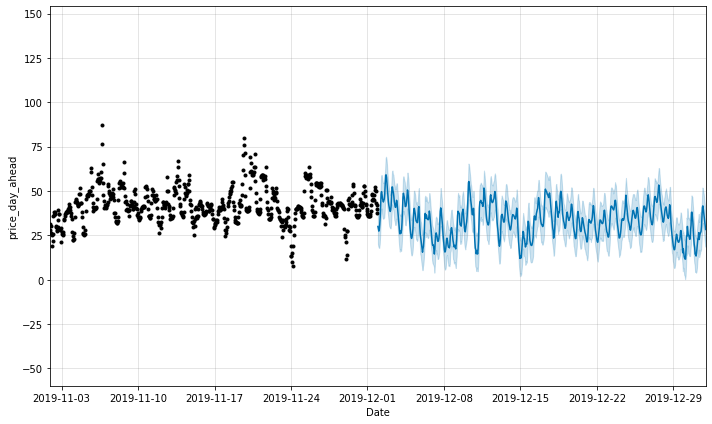

In [24]:
fig3 = m.plot(forecast, uncertainty = True, xlabel = "Date", ylabel = "price_day_ahead")
ax = fig3.gca()
ax.set_xlim(pd.to_datetime([test_start_time - timedelta(days=num_days_for_test), end_time]))

<AxesSubplot:xlabel='Date', ylabel='price_day_ahead'>

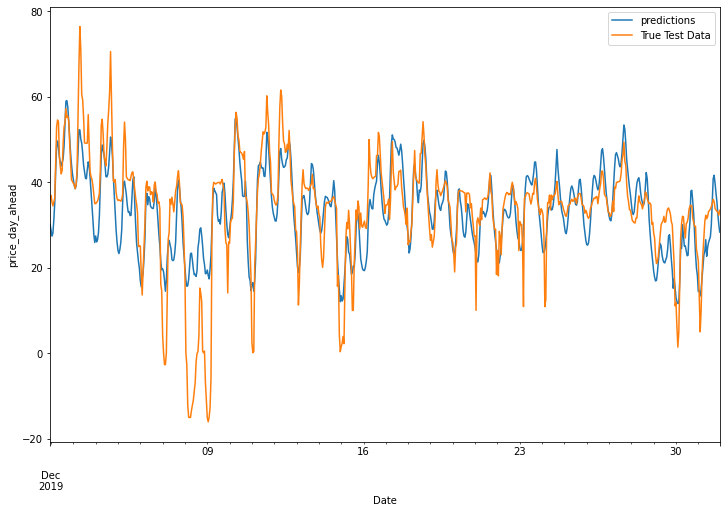

In [25]:
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax, xlabel = "Date", ylabel = "price_day_ahead")

/Users/yash/sunny/Projects/climate-trydan/.venv/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/yash/sunny/Projects/climate-trydan/.venv/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/yash/sunny/Projects/climate-trydan/.venv/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


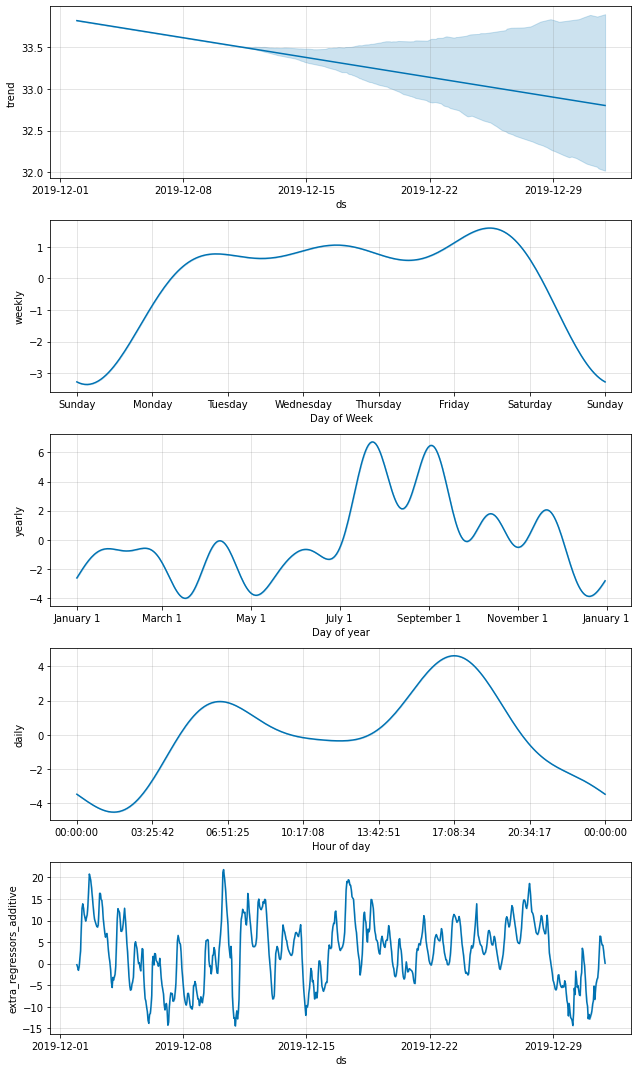

In [26]:
fig2 = m.plot_components(forecast)